# Creating single dataframe for ethnicity data for Alameda 

We will combine ethnicity data from 2011 and 2019 into a single file. This has been a fun experiment, what you see here is the final version of the code. We have 3 parts in this exersice. 
1. Combining the geodataframes(gdf) to produce a single file. 
2. Creating a percentage change column that captures how each ethnicity values changes from 2011 to 2019. 
3. Plot the maps. 

Let us begin by downloading the libraries. 

In [1]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


## Combining the dataframes to produce a single file.
We are uploading the 2011 and 2019 geodataframes. These were the files we outputted and saved in week 4. 

In [2]:
ethn2011 = gpd.read_file("ethn2011v2.geojson")
ethn2019 = gpd.read_file("ethn2019v2.geojson")

Let us check how many roles and columns are there in both the dataframes because, one they should have identical number of rows for the merge to be sensible. We are doing a horizontal merge here. Number of columns should help us determine the size of the merged file. 

In [3]:
ethn2011.shape

(361, 23)

In [4]:
ethn2019.shape

(361, 23)

There, each dataframe has same number of rows. But we cannot still proceed. We need to know what columns we can use, and if there can be any posisble errors on merging. Let us check how the data looks like

In [5]:
ethn2011.head()

,GEOID,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,...,Percent Non Hispanic,Percent Non Hispanic White,Percent Non Hispanic Black,Percent Non Hispanic American Indian and Alaska Native,Percent Non Hispanic Asian,Percent Non Hispanic Native Hawaiian and Other Pacific Islander,Percent Non Hispanic Some other race,Percent Non Hispanic Two or more races,Percent Hispanic,geometry
0,06001427200,4376.0,3710.0,1616.0,135.0,0.0,1702.0,97.0,8.0,152.0,...,84.780622,36.928702,3.085009,0.000000,38.893967,2.216636,0.182815,3.473492,15.219378,"POLYGON ((-122.24255 37.76713, -122.24274 37.7..."
1,06001436200,3804.0,1608.0,583.0,684.0,0.0,62.0,147.0,0.0,132.0,...,42.271293,15.325973,17.981073,0.000000,1.629863,3.864353,0.000000,3.470032,57.728707,"POLYGON ((-122.11752 37.66581, -122.11759 37.6..."
2,06001427100,3480.0,3196.0,2464.0,114.0,0.0,381.0,0.0,20.0,217.0,...,91.839080,70.804598,3.275862,0.000000,10.948276,0.000000,0.574713,6.235632,8.160920,"POLYGON ((-122.23978 37.76608, -122.24013 37.7..."
3,06001427800,4655.0,4038.0,2654.0,188.0,17.0,1018.0,0.0,0.0,161.0,...,86.745435,57.013963,4.038668,0.365199,21.868958,0.000000,0.000000,3.458647,13.254565,"POLYGON ((-122.27563 37.77136, -122.27605 37.7..."
4,06001403300,4061.0,3884.0,1159.0,250.0,0.0,2376.0,0.0,0.0,99.0,...,95.641468,28.539769,6.156119,0.000000,58.507757,0.000000,0.000000,2.437823,4.358532,"POLYGON ((-122.25960 37.79624, -122.25966 37.7..."


In [6]:
ethn2019.head()

,GEOID,NAME,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,...,Percent Non Hispanic,Percent Non Hispanic White,Percent Non Hispanic Black,Percent Non Hispanic American Indian and Alaska Native,Percent Non Hispanic Asian,Percent Non Hispanic Native Hawaiian and Other Pacific Islander,Percent Non Hispanic Some other race,Percent Non Hispanic Two or more races,Percent Hispanic,geometry
0,14000US06001400100,"Census Tract 4001, Alameda, CA",3120.0,3002.0,2317.0,107.0,0.0,391.0,0.0,0.0,...,96.217949,74.262821,3.429487,0.000000,12.532051,0.000000,0.000000,5.993590,3.782051,"MULTIPOLYGON (((-122.24692 37.88544, -122.2466..."
1,14000US06001400200,"Census Tract 4002, Alameda, CA",2007.0,1833.0,1475.0,52.0,4.0,171.0,0.0,0.0,...,91.330344,73.492775,2.590932,0.199302,8.520179,0.000000,0.000000,6.527155,8.669656,"MULTIPOLYGON (((-122.25792 37.84261, -122.2577..."
2,14000US06001400300,"Census Tract 4003, Alameda, CA",5051.0,4700.0,3434.0,459.0,0.0,590.0,23.0,97.0,...,93.050881,67.986537,9.087309,0.000000,11.680855,0.455355,1.920412,1.920412,6.949119,"MULTIPOLYGON (((-122.26563 37.83764, -122.2655..."
3,14000US06001400400,"Census Tract 4004, Alameda, CA",4007.0,3522.0,2554.0,266.0,35.0,420.0,0.0,0.0,...,87.896182,63.738458,6.638383,0.873471,10.481657,0.000000,0.000000,6.164213,12.103818,"MULTIPOLYGON (((-122.26183 37.84162, -122.2618..."
4,14000US06001400500,"Census Tract 4005, Alameda, CA",4124.0,3734.0,1874.0,882.0,0.0,446.0,22.0,6.0,...,90.543162,45.441319,21.387003,0.000000,10.814743,0.533463,0.145490,12.221145,9.456838,"MULTIPOLYGON (((-122.26951 37.84858, -122.2693..."


We can observe the following:
1. GEOID is probably a good column to do the merge on. However the 2011 version is slightly different and needs editing. (Now I also tried keepign the geoid same and merging with the NAME column. But the resultant column had 0 rows for some reason. So the work around was to change values in the geoid column. 
2. The column names are similar, and we need to mark each one by the year to make sense in the final dataset
3. There are two geography columns, name columns. Two geography column will rename both with x /_ and final dataset will not be a gdf. We need to elimintae the duplicates. Alternatively, it might have also made sense to merge on the geometry column. 

Let us get a list of all column names for 2011 and delete the geometry and NAME column

In [7]:
ethn2011.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 23 columns):
 #   Column                                                           Non-Null Count  Dtype   
---  ------                                                           --------------  -----   
 0   GEOID                                                            361 non-null    object  
 1   Total                                                            361 non-null    float64 
 2   Non Hispanic                                                     361 non-null    float64 
 3   Non Hispanic White                                               361 non-null    float64 
 4   Non Hispanic Black                                               361 non-null    float64 
 5   Non Hispanic American Indian and Alaska Native                   361 non-null    float64 
 6   Non Hispanic Asian                                               361 non-null    float64 
 7   Non Hispanic Native Hawaiia

Deleting geometry

In [8]:
ethn2011=ethn2011.loc[:, ethn2011.columns !='geometry']

Deleting NAME

In [9]:
ethn2011=ethn2011.loc[:, ethn2011.columns !='NAME']

Now we will correct the GEOID in the 2011 by addding the 14000US to the start of each value. If you remember, previously we removed this column to convert the csv to a gdf due to limitations in the gdf file we used for the merge. We convert the geoid to string to be able to do this properly. I tried it without converting to string, it ended up merging with 0 rows. 

In [10]:
ethn2011['GEOID']=ethn2011['GEOID'].astype('str')

In [11]:
ethn2019['GEOID']=ethn2019['GEOID'].astype('str')

Now we will correct the GEOID in the 2011 by addding the 14000US to the start of each value. If you remember, previously we removed this column to convert the csv to a gdf due to limitations in the gdf file we used for the merge.

In [12]:
ethn2011['GEOID']='14000US'+ethn2011['GEOID']

Let us check if it worked

In [13]:
ethn2011['GEOID']

0      14000US06001427200
1      14000US06001436200
2      14000US06001427100
3      14000US06001427800
4      14000US06001403300
              ...        
356    14000US06001410500
357    14000US06001425104
358    14000US06001433104
359    14000US06001440333
360    14000US06001441524
Name: GEOID, Length: 361, dtype: object

In [14]:
ethn2011.head()

,GEOID,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,...,Percent Total,Percent Non Hispanic,Percent Non Hispanic White,Percent Non Hispanic Black,Percent Non Hispanic American Indian and Alaska Native,Percent Non Hispanic Asian,Percent Non Hispanic Native Hawaiian and Other Pacific Islander,Percent Non Hispanic Some other race,Percent Non Hispanic Two or more races,Percent Hispanic
0,14000US06001427200,4376.0,3710.0,1616.0,135.0,0.0,1702.0,97.0,8.0,152.0,...,100.0,84.780622,36.928702,3.085009,0.000000,38.893967,2.216636,0.182815,3.473492,15.219378
1,14000US06001436200,3804.0,1608.0,583.0,684.0,0.0,62.0,147.0,0.0,132.0,...,100.0,42.271293,15.325973,17.981073,0.000000,1.629863,3.864353,0.000000,3.470032,57.728707
2,14000US06001427100,3480.0,3196.0,2464.0,114.0,0.0,381.0,0.0,20.0,217.0,...,100.0,91.839080,70.804598,3.275862,0.000000,10.948276,0.000000,0.574713,6.235632,8.160920
3,14000US06001427800,4655.0,4038.0,2654.0,188.0,17.0,1018.0,0.0,0.0,161.0,...,100.0,86.745435,57.013963,4.038668,0.365199,21.868958,0.000000,0.000000,3.458647,13.254565
4,14000US06001403300,4061.0,3884.0,1159.0,250.0,0.0,2376.0,0.0,0.0,99.0,...,100.0,95.641468,28.539769,6.156119,0.000000,58.507757,0.000000,0.000000,2.437823,4.358532


Perfect! Now rename the columns with 2011 or 2019 suffix. 

In [15]:
list(ethn2011)

['GEOID',
 'Total',
 'Non Hispanic',
 'Non Hispanic White',
 'Non Hispanic Black',
 'Non Hispanic American Indian and Alaska Native',
 'Non Hispanic Asian',
 'Non Hispanic Native Hawaiian and Other Pacific Islander',
 'Non Hispanic Some other race',
 'Non Hispanic Two or more races',
 'Hispanic',
 'Percent Total',
 'Percent Non Hispanic',
 'Percent Non Hispanic White',
 'Percent Non Hispanic Black',
 'Percent Non Hispanic American Indian and Alaska Native',
 'Percent Non Hispanic Asian',
 'Percent Non Hispanic Native Hawaiian and Other Pacific Islander',
 'Percent Non Hispanic Some other race',
 'Percent Non Hispanic Two or more races',
 'Percent Hispanic']

In [16]:
col2011=['GEOID',
 'Total_2011',
 'Non Hispanic_2011',
 'Non Hispanic White_2011',
 'Non Hispanic Black_2011',
 'Non Hispanic American Indian and Alaska Native_2011',
 'Non Hispanic Asian_2011',
 'Non Hispanic Native Hawaiian and Other Pacific Islander_2011',
 'Non Hispanic Some other race_2011',
 'Non Hispanic Two or more races_2011',
 'Hispanic_2011',     
 'Percent Total_2011',
 'Percent Non Hispanic_2011',
 'Percent Non Hispanic White_2011',
 'Percent Non Hispanic Black_2011',
 'Percent Non Hispanic American Indian and Alaska Native_2011',
 'Percent Non Hispanic Asian_2011',
 'Percent Non Hispanic Native Hawaiian and Other Pacific Islander_2011',
 'Percent Non Hispanic Some other race_2011',
 'Percent Non Hispanic Two or more races_2011',
 'Percent Hispanic_2011']

In [17]:
ethn2011.columns=col2011

In [18]:
ethn2011.head()

,GEOID,Total_2011,Non Hispanic_2011,Non Hispanic White_2011,Non Hispanic Black_2011,Non Hispanic American Indian and Alaska Native_2011,Non Hispanic Asian_2011,Non Hispanic Native Hawaiian and Other Pacific Islander_2011,Non Hispanic Some other race_2011,Non Hispanic Two or more races_2011,...,Percent Total_2011,Percent Non Hispanic_2011,Percent Non Hispanic White_2011,Percent Non Hispanic Black_2011,Percent Non Hispanic American Indian and Alaska Native_2011,Percent Non Hispanic Asian_2011,Percent Non Hispanic Native Hawaiian and Other Pacific Islander_2011,Percent Non Hispanic Some other race_2011,Percent Non Hispanic Two or more races_2011,Percent Hispanic_2011
0,14000US06001427200,4376.0,3710.0,1616.0,135.0,0.0,1702.0,97.0,8.0,152.0,...,100.0,84.780622,36.928702,3.085009,0.000000,38.893967,2.216636,0.182815,3.473492,15.219378
1,14000US06001436200,3804.0,1608.0,583.0,684.0,0.0,62.0,147.0,0.0,132.0,...,100.0,42.271293,15.325973,17.981073,0.000000,1.629863,3.864353,0.000000,3.470032,57.728707
2,14000US06001427100,3480.0,3196.0,2464.0,114.0,0.0,381.0,0.0,20.0,217.0,...,100.0,91.839080,70.804598,3.275862,0.000000,10.948276,0.000000,0.574713,6.235632,8.160920
3,14000US06001427800,4655.0,4038.0,2654.0,188.0,17.0,1018.0,0.0,0.0,161.0,...,100.0,86.745435,57.013963,4.038668,0.365199,21.868958,0.000000,0.000000,3.458647,13.254565
4,14000US06001403300,4061.0,3884.0,1159.0,250.0,0.0,2376.0,0.0,0.0,99.0,...,100.0,95.641468,28.539769,6.156119,0.000000,58.507757,0.000000,0.000000,2.437823,4.358532


The rename is successful. Notice it no longer has the geometry or NAME column. Similarly for 2019

In [19]:
col2019=['GEOID',
 'NAME',
 'Total_2019',
 'Non Hispanic_2019',
 'Non Hispanic White_2019',
 'Non Hispanic Black_2019',
 'Non Hispanic American Indian and Alaska Native_2019',
 'Non Hispanic Asian_2019',
 'Non Hispanic Native Hawaiian and Other Pacific Islander_2019',
 'Non Hispanic Some other race_2019',
 'Non Hispanic Two or more races_2019',
 'Hispanic_2019',
 'Percent Total_2019',
 'Percent Non Hispanic_2019',
 'Percent Non Hispanic White_2019',
 'Percent Non Hispanic Black_2019',
 'Percent Non Hispanic American Indian and Alaska Native_2019',
 'Percent Non Hispanic Asian_2019',
 'Percent Non Hispanic Native Hawaiian and Other Pacific Islander_2019',
 'Percent Non Hispanic Some other race_2019',
 'Percent Non Hispanic Two or more races_2019',
 'Percent Hispanic_2019',
 'geometry']

In [20]:
ethn2019.columns=col2019

In [21]:
ethn2019.head()

,GEOID,NAME,Total_2019,Non Hispanic_2019,Non Hispanic White_2019,Non Hispanic Black_2019,Non Hispanic American Indian and Alaska Native_2019,Non Hispanic Asian_2019,Non Hispanic Native Hawaiian and Other Pacific Islander_2019,Non Hispanic Some other race_2019,...,Percent Non Hispanic_2019,Percent Non Hispanic White_2019,Percent Non Hispanic Black_2019,Percent Non Hispanic American Indian and Alaska Native_2019,Percent Non Hispanic Asian_2019,Percent Non Hispanic Native Hawaiian and Other Pacific Islander_2019,Percent Non Hispanic Some other race_2019,Percent Non Hispanic Two or more races_2019,Percent Hispanic_2019,geometry
0,14000US06001400100,"Census Tract 4001, Alameda, CA",3120.0,3002.0,2317.0,107.0,0.0,391.0,0.0,0.0,...,96.217949,74.262821,3.429487,0.000000,12.532051,0.000000,0.000000,5.993590,3.782051,"MULTIPOLYGON (((-122.24692 37.88544, -122.2466..."
1,14000US06001400200,"Census Tract 4002, Alameda, CA",2007.0,1833.0,1475.0,52.0,4.0,171.0,0.0,0.0,...,91.330344,73.492775,2.590932,0.199302,8.520179,0.000000,0.000000,6.527155,8.669656,"MULTIPOLYGON (((-122.25792 37.84261, -122.2577..."
2,14000US06001400300,"Census Tract 4003, Alameda, CA",5051.0,4700.0,3434.0,459.0,0.0,590.0,23.0,97.0,...,93.050881,67.986537,9.087309,0.000000,11.680855,0.455355,1.920412,1.920412,6.949119,"MULTIPOLYGON (((-122.26563 37.83764, -122.2655..."
3,14000US06001400400,"Census Tract 4004, Alameda, CA",4007.0,3522.0,2554.0,266.0,35.0,420.0,0.0,0.0,...,87.896182,63.738458,6.638383,0.873471,10.481657,0.000000,0.000000,6.164213,12.103818,"MULTIPOLYGON (((-122.26183 37.84162, -122.2618..."
4,14000US06001400500,"Census Tract 4005, Alameda, CA",4124.0,3734.0,1874.0,882.0,0.0,446.0,22.0,6.0,...,90.543162,45.441319,21.387003,0.000000,10.814743,0.533463,0.145490,12.221145,9.456838,"MULTIPOLYGON (((-122.26951 37.84858, -122.2693..."


Now to check column numbers in both

In [22]:
ethn2019.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 23 columns):
 #   Column                                                                Non-Null Count  Dtype   
---  ------                                                                --------------  -----   
 0   GEOID                                                                 361 non-null    object  
 1   NAME                                                                  361 non-null    object  
 2   Total_2019                                                            361 non-null    float64 
 3   Non Hispanic_2019                                                     361 non-null    float64 
 4   Non Hispanic White_2019                                               361 non-null    float64 
 5   Non Hispanic Black_2019                                               361 non-null    float64 
 6   Non Hispanic American Indian and Alaska Native_2019                   361 non-null

In [23]:
ethn2011.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 21 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   GEOID                                                                 361 non-null    object 
 1   Total_2011                                                            361 non-null    float64
 2   Non Hispanic_2011                                                     361 non-null    float64
 3   Non Hispanic White_2011                                               361 non-null    float64
 4   Non Hispanic Black_2011                                               361 non-null    float64
 5   Non Hispanic American Indian and Alaska Native_2011                   361 non-null    float64
 6   Non Hispanic Asian_2011                                               361 non-null    floa

Out final dataframe should have 361 rows and 43 columns. for the merge

### Merge

In [24]:
ealameda=ethn2019.merge(ethn2011, on='GEOID')

To check the merged file

In [25]:
ealameda.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 361 entries, 0 to 360
Data columns (total 43 columns):
 #   Column                                                                Non-Null Count  Dtype   
---  ------                                                                --------------  -----   
 0   GEOID                                                                 361 non-null    object  
 1   NAME                                                                  361 non-null    object  
 2   Total_2019                                                            361 non-null    float64 
 3   Non Hispanic_2019                                                     361 non-null    float64 
 4   Non Hispanic White_2019                                               361 non-null    float64 
 5   Non Hispanic Black_2019                                               361 non-null    float64 
 6   Non Hispanic American Indian and Alaska Native_2019                   361 non-null

Good! Sucessful. Now we need to create the percentage change from 2011 to 2019. Let us understand the data first.

In [26]:
ealameda.head()

,GEOID,NAME,Total_2019,Non Hispanic_2019,Non Hispanic White_2019,Non Hispanic Black_2019,Non Hispanic American Indian and Alaska Native_2019,Non Hispanic Asian_2019,Non Hispanic Native Hawaiian and Other Pacific Islander_2019,Non Hispanic Some other race_2019,...,Percent Total_2011,Percent Non Hispanic_2011,Percent Non Hispanic White_2011,Percent Non Hispanic Black_2011,Percent Non Hispanic American Indian and Alaska Native_2011,Percent Non Hispanic Asian_2011,Percent Non Hispanic Native Hawaiian and Other Pacific Islander_2011,Percent Non Hispanic Some other race_2011,Percent Non Hispanic Two or more races_2011,Percent Hispanic_2011
0,14000US06001400100,"Census Tract 4001, Alameda, CA",3120.0,3002.0,2317.0,107.0,0.0,391.0,0.0,0.0,...,100.0,96.532028,77.274582,5.059160,0.000000,9.302326,0.652795,0.000000,4.243166,3.467972
1,14000US06001400200,"Census Tract 4002, Alameda, CA",2007.0,1833.0,1475.0,52.0,4.0,171.0,0.0,0.0,...,100.0,91.012839,69.900143,3.423680,0.618165,11.031859,0.000000,0.475511,5.563481,8.987161
2,14000US06001400300,"Census Tract 4003, Alameda, CA",5051.0,4700.0,3434.0,459.0,0.0,590.0,23.0,97.0,...,100.0,90.939465,69.614780,11.477987,0.766509,5.719340,0.000000,0.000000,3.360849,9.060535
3,14000US06001400400,"Census Tract 4004, Alameda, CA",4007.0,3522.0,2554.0,266.0,35.0,420.0,0.0,0.0,...,100.0,88.587370,66.548313,8.597515,0.735481,4.007101,0.000000,1.648491,7.050469,11.412630
4,14000US06001400500,"Census Tract 4005, Alameda, CA",4124.0,3734.0,1874.0,882.0,0.0,446.0,22.0,6.0,...,100.0,89.629417,47.917265,30.623384,0.316001,5.343292,0.000000,0.402183,5.027291,10.370583


In [27]:
list(ealameda)

['GEOID',
 'NAME',
 'Total_2019',
 'Non Hispanic_2019',
 'Non Hispanic White_2019',
 'Non Hispanic Black_2019',
 'Non Hispanic American Indian and Alaska Native_2019',
 'Non Hispanic Asian_2019',
 'Non Hispanic Native Hawaiian and Other Pacific Islander_2019',
 'Non Hispanic Some other race_2019',
 'Non Hispanic Two or more races_2019',
 'Hispanic_2019',
 'Percent Total_2019',
 'Percent Non Hispanic_2019',
 'Percent Non Hispanic White_2019',
 'Percent Non Hispanic Black_2019',
 'Percent Non Hispanic American Indian and Alaska Native_2019',
 'Percent Non Hispanic Asian_2019',
 'Percent Non Hispanic Native Hawaiian and Other Pacific Islander_2019',
 'Percent Non Hispanic Some other race_2019',
 'Percent Non Hispanic Two or more races_2019',
 'Percent Hispanic_2019',
 'geometry',
 'Total_2011',
 'Non Hispanic_2011',
 'Non Hispanic White_2011',
 'Non Hispanic Black_2011',
 'Non Hispanic American Indian and Alaska Native_2011',
 'Non Hispanic Asian_2011',
 'Non Hispanic Native Hawaiian and 

## Percentage Change 2019 over 2011

Now we use a neat piece of code, curtesy my friend kushal to suggesting how to split text. We create a new column for all absolute values of different ethnicities in Alameda. 

In [28]:
ealamed=ealameda

for i in list(ealamed.columns):
    if "2019" in i:
        ealamed[i.split("_")[0]+"_change"]= (((ealamed[i]-ealamed[i.split("_")[0]+"_2011"])/ealamed[i.split("_")[0]+"_2011"])*100)
       

Now we check if the columns have been created

In [29]:
ealamed.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 361 entries, 0 to 360
Data columns (total 63 columns):
 #   Column                                                                  Non-Null Count  Dtype   
---  ------                                                                  --------------  -----   
 0   GEOID                                                                   361 non-null    object  
 1   NAME                                                                    361 non-null    object  
 2   Total_2019                                                              361 non-null    float64 
 3   Non Hispanic_2019                                                       361 non-null    float64 
 4   Non Hispanic White_2019                                                 361 non-null    float64 
 5   Non Hispanic Black_2019                                                 361 non-null    float64 
 6   Non Hispanic American Indian and Alaska Native_2019               

Yes!
Many of the columns do not have 361 values. Some issues. First let us drop the percentage change over percengate change. Makes no sense.

In [30]:
list(ealamed)

['GEOID',
 'NAME',
 'Total_2019',
 'Non Hispanic_2019',
 'Non Hispanic White_2019',
 'Non Hispanic Black_2019',
 'Non Hispanic American Indian and Alaska Native_2019',
 'Non Hispanic Asian_2019',
 'Non Hispanic Native Hawaiian and Other Pacific Islander_2019',
 'Non Hispanic Some other race_2019',
 'Non Hispanic Two or more races_2019',
 'Hispanic_2019',
 'Percent Total_2019',
 'Percent Non Hispanic_2019',
 'Percent Non Hispanic White_2019',
 'Percent Non Hispanic Black_2019',
 'Percent Non Hispanic American Indian and Alaska Native_2019',
 'Percent Non Hispanic Asian_2019',
 'Percent Non Hispanic Native Hawaiian and Other Pacific Islander_2019',
 'Percent Non Hispanic Some other race_2019',
 'Percent Non Hispanic Two or more races_2019',
 'Percent Hispanic_2019',
 'geometry',
 'Total_2011',
 'Non Hispanic_2011',
 'Non Hispanic White_2011',
 'Non Hispanic Black_2011',
 'Non Hispanic American Indian and Alaska Native_2011',
 'Non Hispanic Asian_2011',
 'Non Hispanic Native Hawaiian and 

In [31]:
keep_columns=['GEOID',
 'NAME',
 'Total_2019',
 'Non Hispanic_2019',
 'Non Hispanic White_2019',
 'Non Hispanic Black_2019',
 'Non Hispanic American Indian and Alaska Native_2019',
 'Non Hispanic Asian_2019',
 'Non Hispanic Native Hawaiian and Other Pacific Islander_2019',
 'Non Hispanic Some other race_2019',
 'Non Hispanic Two or more races_2019',
 'Hispanic_2019',
 'Percent Total_2019',
 'Percent Non Hispanic_2019',
 'Percent Non Hispanic White_2019',
 'Percent Non Hispanic Black_2019',
 'Percent Non Hispanic American Indian and Alaska Native_2019',
 'Percent Non Hispanic Asian_2019',
 'Percent Non Hispanic Native Hawaiian and Other Pacific Islander_2019',
 'Percent Non Hispanic Some other race_2019',
 'Percent Non Hispanic Two or more races_2019',
 'Percent Hispanic_2019',
 'geometry',
 'Total_2011',
 'Non Hispanic_2011',
 'Non Hispanic White_2011',
 'Non Hispanic Black_2011',
 'Non Hispanic American Indian and Alaska Native_2011',
 'Non Hispanic Asian_2011',
 'Non Hispanic Native Hawaiian and Other Pacific Islander_2011',
 'Non Hispanic Some other race_2011',
 'Non Hispanic Two or more races_2011',
 'Hispanic_2011',
 'Percent Total_2011',
 'Percent Non Hispanic_2011',
 'Percent Non Hispanic White_2011',
 'Percent Non Hispanic Black_2011',
 'Percent Non Hispanic American Indian and Alaska Native_2011',
 'Percent Non Hispanic Asian_2011',
 'Percent Non Hispanic Native Hawaiian and Other Pacific Islander_2011',
 'Percent Non Hispanic Some other race_2011',
 'Percent Non Hispanic Two or more races_2011',
 'Percent Hispanic_2011',
 'Total_change',
 'Non Hispanic_change',
 'Non Hispanic White_change',
 'Non Hispanic Black_change',
 'Non Hispanic American Indian and Alaska Native_change',
 'Non Hispanic Asian_change',
 'Non Hispanic Native Hawaiian and Other Pacific Islander_change',
 'Non Hispanic Some other race_change',
 'Non Hispanic Two or more races_change',
 'Hispanic_change']

In [32]:
ealamed2=ealamed[keep_columns]

Let us check if the new gdf has the required columns only.

In [33]:
ealamed2.head()

,GEOID,NAME,Total_2019,Non Hispanic_2019,Non Hispanic White_2019,Non Hispanic Black_2019,Non Hispanic American Indian and Alaska Native_2019,Non Hispanic Asian_2019,Non Hispanic Native Hawaiian and Other Pacific Islander_2019,Non Hispanic Some other race_2019,...,Total_change,Non Hispanic_change,Non Hispanic White_change,Non Hispanic Black_change,Non Hispanic American Indian and Alaska Native_change,Non Hispanic Asian_change,Non Hispanic Native Hawaiian and Other Pacific Islander_change,Non Hispanic Some other race_change,Non Hispanic Two or more races_change,Hispanic_change
0,14000US06001400100,"Census Tract 4001, Alameda, CA",3120.0,3002.0,2317.0,107.0,0.0,391.0,0.0,0.0,...,27.294982,26.880811,22.333685,-13.709677,NaN,71.491228,-100.0,NaN,79.807692,38.823529
1,14000US06001400200,"Census Tract 4002, Alameda, CA",2007.0,1833.0,1475.0,52.0,4.0,171.0,0.0,0.0,...,-4.564907,-4.231975,0.340136,-27.777778,-69.230769,-26.293103,NaN,-100.000000,11.965812,-7.936508
2,14000US06001400300,"Census Tract 4003, Alameda, CA",5051.0,4700.0,3434.0,459.0,0.0,590.0,23.0,97.0,...,-0.727201,1.577696,-3.049125,-21.404110,-100.000000,102.749141,inf,inf,-43.274854,-23.861171
3,14000US06001400400,"Census Tract 4004, Alameda, CA",4007.0,3522.0,2554.0,266.0,35.0,420.0,0.0,0.0,...,1.623130,0.830232,-2.667683,-21.533923,20.689655,165.822785,NaN,-100.000000,-11.151079,7.777778
4,14000US06001400500,"Census Tract 4005, Alameda, CA",4124.0,3734.0,1874.0,882.0,0.0,446.0,22.0,6.0,...,18.471704,19.679487,12.350120,-17.260788,-100.000000,139.784946,inf,-57.142857,188.000000,8.033241


Columns

In [34]:
ealamed2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 361 entries, 0 to 360
Data columns (total 53 columns):
 #   Column                                                                Non-Null Count  Dtype   
---  ------                                                                --------------  -----   
 0   GEOID                                                                 361 non-null    object  
 1   NAME                                                                  361 non-null    object  
 2   Total_2019                                                            361 non-null    float64 
 3   Non Hispanic_2019                                                     361 non-null    float64 
 4   Non Hispanic White_2019                                               361 non-null    float64 
 5   Non Hispanic Black_2019                                               361 non-null    float64 
 6   Non Hispanic American Indian and Alaska Native_2019                   361 non-null

## Plots and Maps

First to get summary

In [35]:
x=0
for i in ealamed2.columns:
    if "change" in i:
        x+=1
        print(x)
        print( '\033[1m', "Summary for percentage", "change in", i.split("_")[0], "residents in Alameda from 2011 to 2019", '\033[0m')
        print(ealamed2[i].describe(), "\n")

1
 Summary for percentage change in Total residents in Alameda from 2011 to 2019 
count    360.000000
mean      12.508455
std       33.742487
min      -33.661279
25%        1.941373
50%        8.367839
75%       17.635617
max      582.985258
Name: Total_change, dtype: float64 

2
 Summary for percentage change in Non Hispanic residents in Alameda from 2011 to 2019 
count    360.000000
mean      12.261748
std       36.306426
min      -37.323280
25%       -0.183363
50%        7.916858
75%       18.587388
max      596.638655
Name: Non Hispanic_change, dtype: float64 

3
 Summary for percentage change in Non Hispanic White residents in Alameda from 2011 to 2019 
count    360.000000
mean      13.470849
std       54.287299
min      -77.483444
25%      -13.639279
50%        0.282125
75%       22.890084
max      388.888889
Name: Non Hispanic White_change, dtype: float64 

4
 Summary for percentage change in Non Hispanic Black residents in Alameda from 2011 to 2019 
count    359.000000
mean    

/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


In [36]:
df=['GEOID']
for i in ealamed2.columns:
    if "change" in i:
        df+=[i]
       

In [37]:
df

['GEOID',
 'Total_change',
 'Non Hispanic_change',
 'Non Hispanic White_change',
 'Non Hispanic Black_change',
 'Non Hispanic American Indian and Alaska Native_change',
 'Non Hispanic Asian_change',
 'Non Hispanic Native Hawaiian and Other Pacific Islander_change',
 'Non Hispanic Some other race_change',
 'Non Hispanic Two or more races_change',
 'Hispanic_change']

In [38]:
x=0
for i in ealamed2.columns:
    if "change" in i:
        x+=1
        print(x)
        print( '\033[1m', "Maximum Change", "change in", i.split("_")[0], "residents in Alameda from 2011 to 2019", '\033[0m')
        print(max(ealamed2[i]), "\n")

1
 Maximum Change change in Total residents in Alameda from 2011 to 2019 
582.985257985258 

2
 Maximum Change change in Non Hispanic residents in Alameda from 2011 to 2019 
596.6386554621849 

3
 Maximum Change change in Non Hispanic White residents in Alameda from 2011 to 2019 
388.88888888888886 

4
 Maximum Change change in Non Hispanic Black residents in Alameda from 2011 to 2019 
inf 

5
 Maximum Change change in Non Hispanic American Indian and Alaska Native residents in Alameda from 2011 to 2019 
nan 

6
 Maximum Change change in Non Hispanic Asian residents in Alameda from 2011 to 2019 
1834.549356223176 

7
 Maximum Change change in Non Hispanic Native Hawaiian and Other Pacific Islander residents in Alameda from 2011 to 2019 
inf 

8
 Maximum Change change in Non Hispanic Some other race residents in Alameda from 2011 to 2019 
nan 

9
 Maximum Change change in Non Hispanic Two or more races residents in Alameda from 2011 to 2019 
inf 

10
 Maximum Change change in Hispanic r

In [39]:
# reproject to Web Mercator
ealamed2_webmer = ealamed2.to_crs(epsg=3857)

/opt/conda/lib/python3.9/site-packages/mapclassify/classifiers.py:860: RuntimeWarning: invalid value encountered in subtract
  css = yc - yc.mean()
/opt/conda/lib/python3.9/site-packages/mapclassify/classifiers.py:891: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam
/opt/conda/lib/python3.9/site-packages/mapclassify/classifiers.py:860: RuntimeWarning: invalid value encountered in subtract
  css = yc - yc.mean()
/opt/conda/lib/python3.9/site-packages/mapclassify/classifiers.py:882: RuntimeWarning: invalid value encountered in subtract
  ycd = np.abs(yc - yc_med)
/opt/conda/lib/python3.9/site-packages/mapclassify/classifiers.py:890: RuntimeWarning: invalid value encountered in subtract
  adam = (np.abs(self.y - np.median(self.y))).sum()
/opt/conda/lib/python3.9/site-packages/mapclassify/classifiers.py:860: RuntimeWarning: invalid value encountered in subtract
  css = yc - yc.mean()
/opt/conda/lib/python3.9/site-packages/mapclassify/classifiers.py

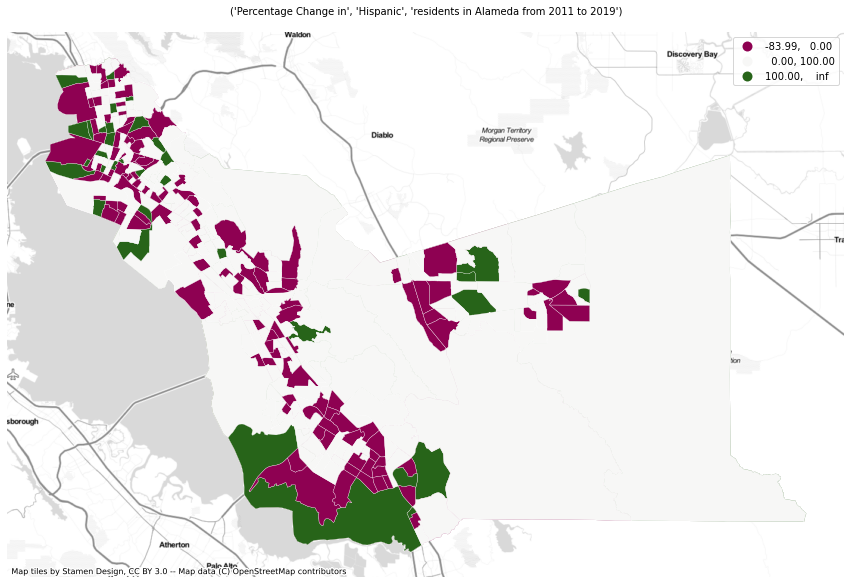

In [40]:
fig, ax = plt.subplots(figsize=(15, 15))
x=0
for i in ealamed2.columns:
    if "change" in i:
        ealamed2_webmer.plot(column=i,
            cmap='PiYG', 
            scheme='user_defined',
            classification_kwds={'bins':[0,100]},
            edgecolor='white', 
            linewidth=0.3, 
            ax=ax, 
            legend=True
           )
        ax.axis('off')
        y='Percentage Change in', i.split("_")[0], "residents in Alameda from 2011 to 2019"
        ax.set_title(y,fontsize=10,pad=18)
        ctx.add_basemap(ax,source=ctx.providers.Stamen.TonerLite)

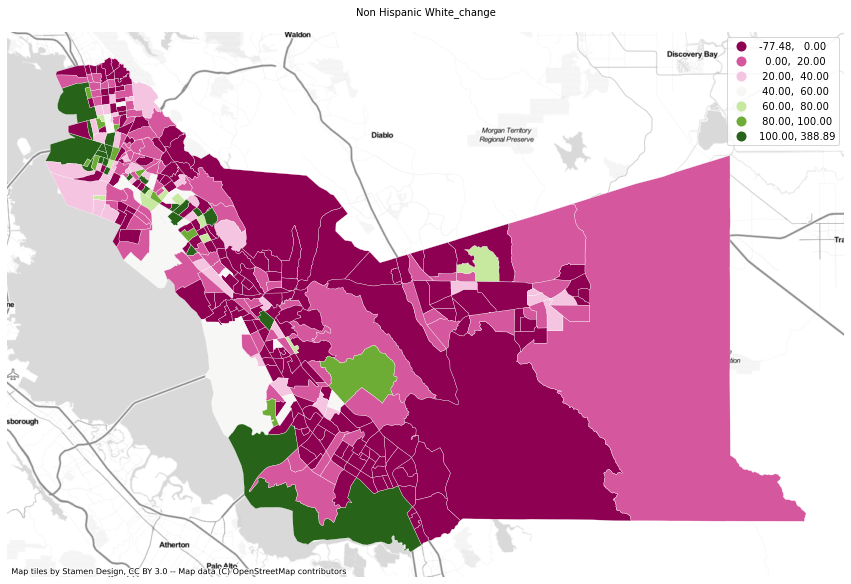

In [41]:
fig, ax = plt.subplots(figsize=(15, 15))
ealamed2_webmer.plot(column='Non Hispanic White_change',
            cmap='PiYG', 
            scheme='user_defined',
            classification_kwds={'bins':[0,20,40,60,80,100]},
            edgecolor='white', 
            linewidth=0.3, 
            ax=ax, 
            legend=True
           )
ax.axis('off')
ax.set_title('Non Hispanic White_change',fontsize=10,pad=18)
ctx.add_basemap(ax,source=ctx.providers.Stamen.TonerLite)

In [42]:
ealamed2.to_file("ealamed2.geojson", driver='GeoJSON')